In [337]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns



In [338]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler 

In [339]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [340]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [341]:

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

c:\Users\sanja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [342]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Feature Analysis and Visualisation

In [343]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [344]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [346]:
df.memory_usage()

Index       128
CRIM       4048
ZN         4048
INDUS      4048
CHAS       4048
NOX        4048
RM         4048
AGE        4048
DIS        4048
RAD        4048
TAX        4048
PTRATIO    4048
B          4048
LSTAT      4048
MEDV       4048
dtype: int64

In [347]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

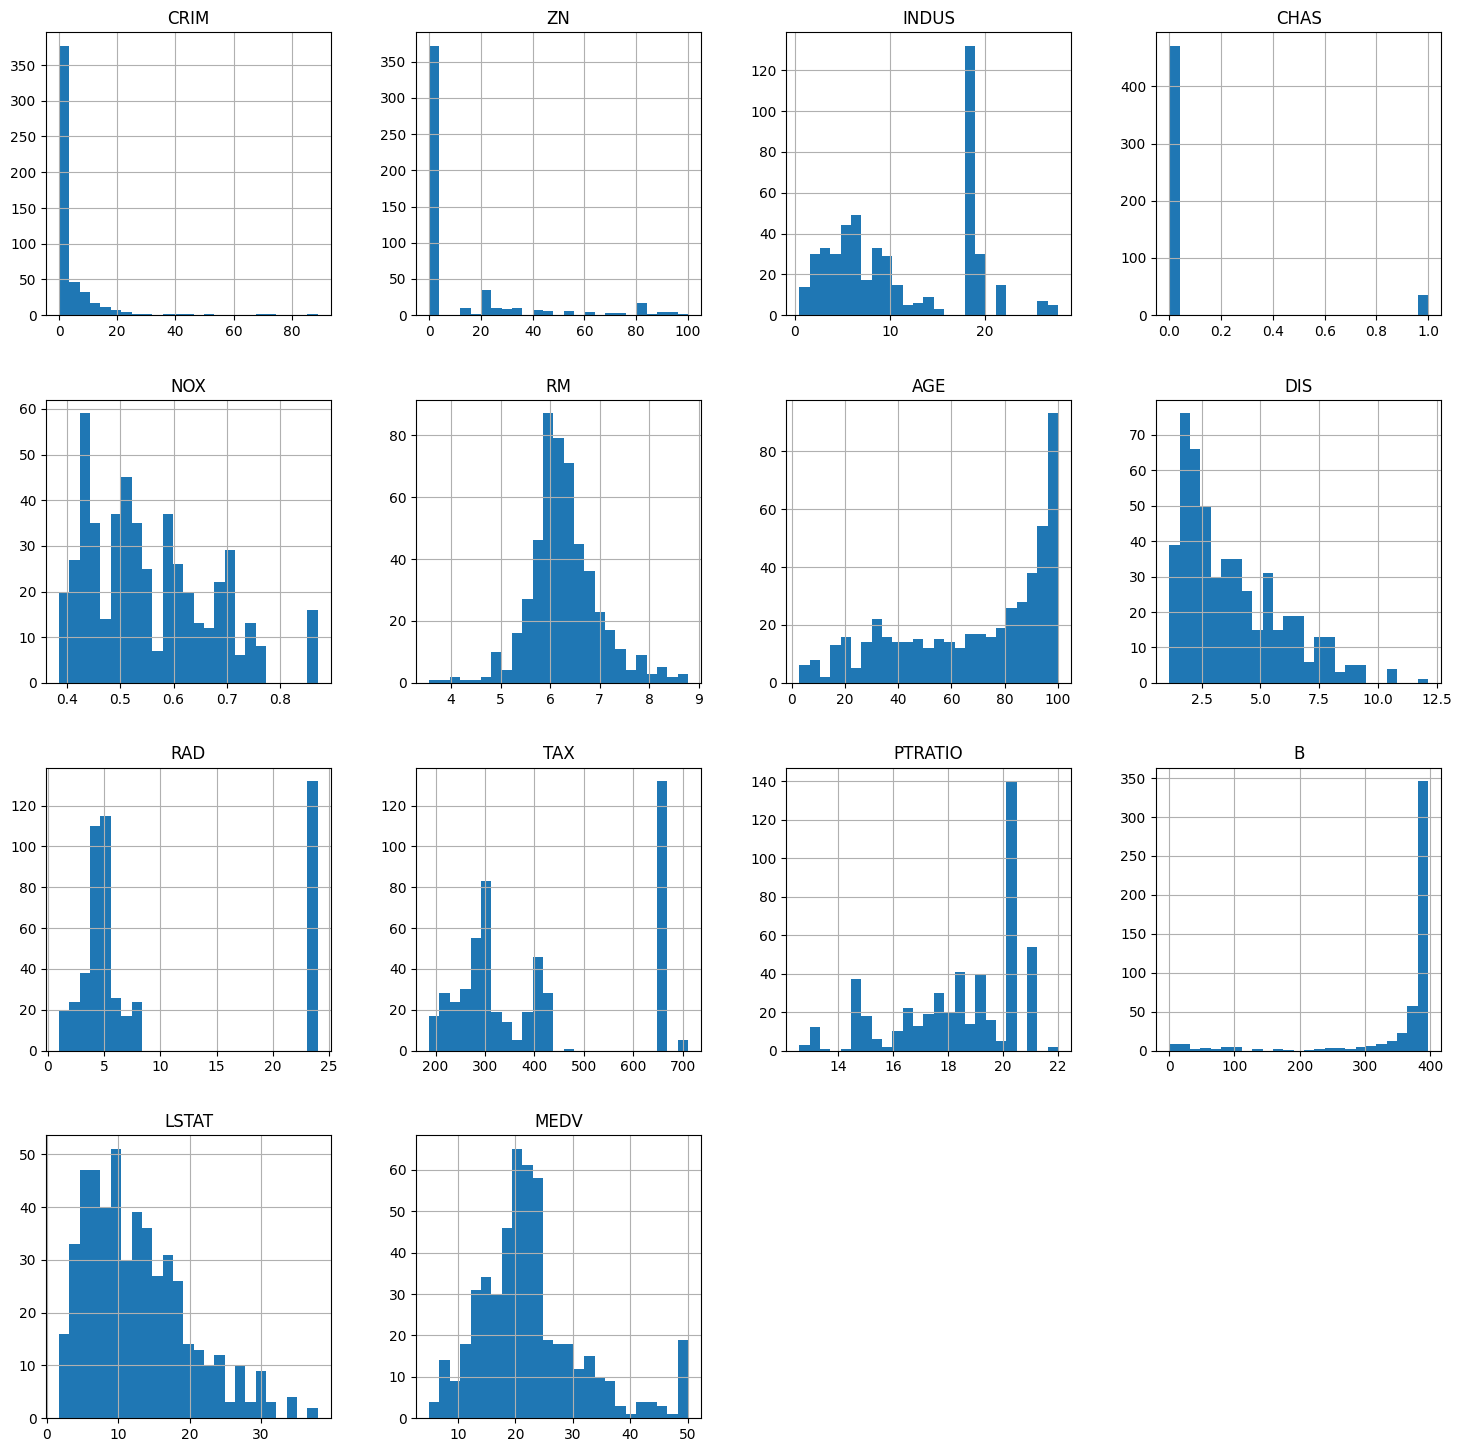

In [348]:
df.hist(figsize=(18,18), bins=25)

c:\Users\sanja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
c:\Users\sanja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
c:\Users\sanja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
c:\Users\sanja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` 

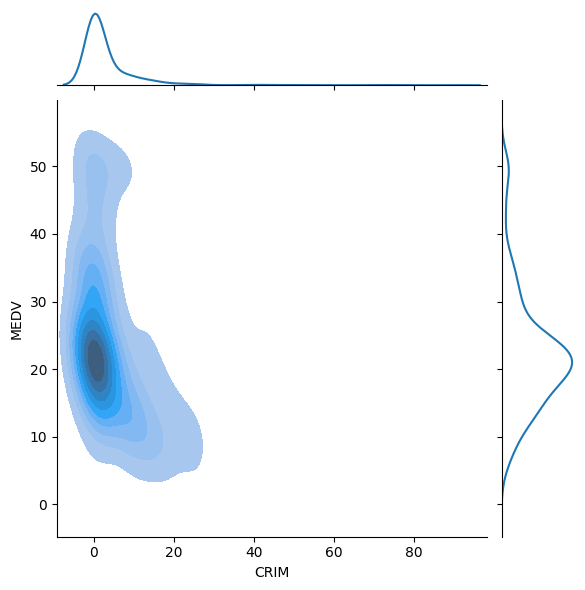

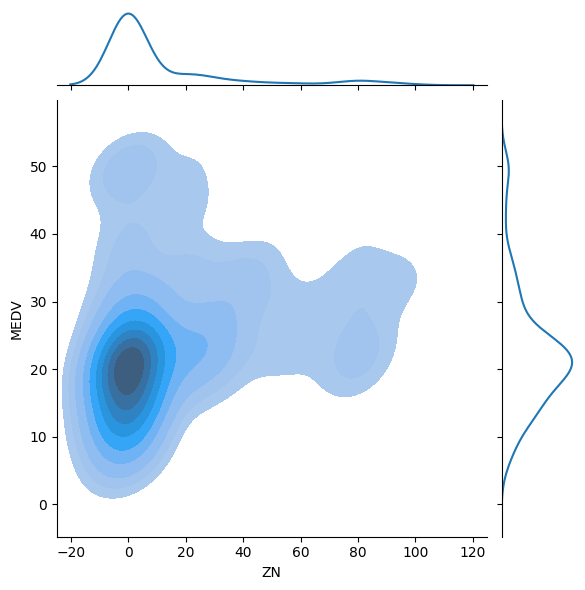

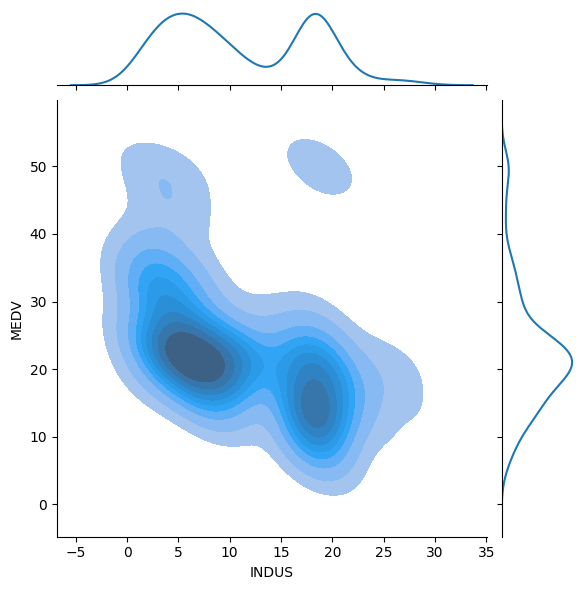

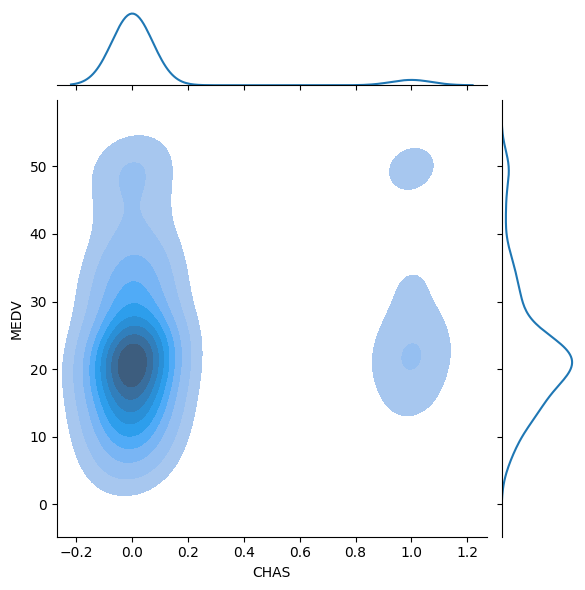

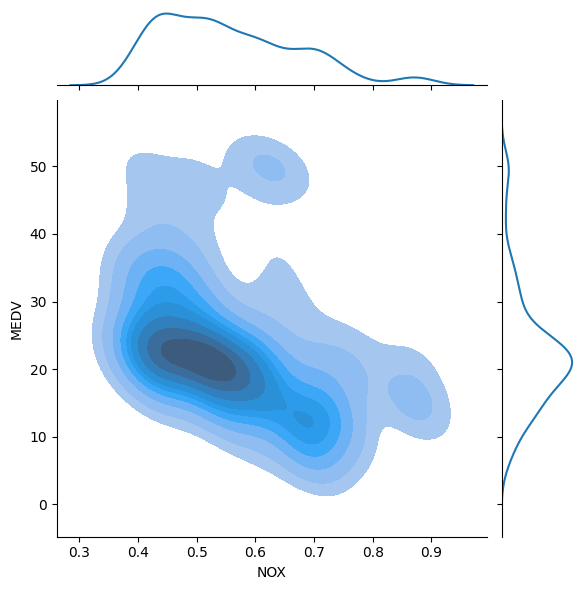

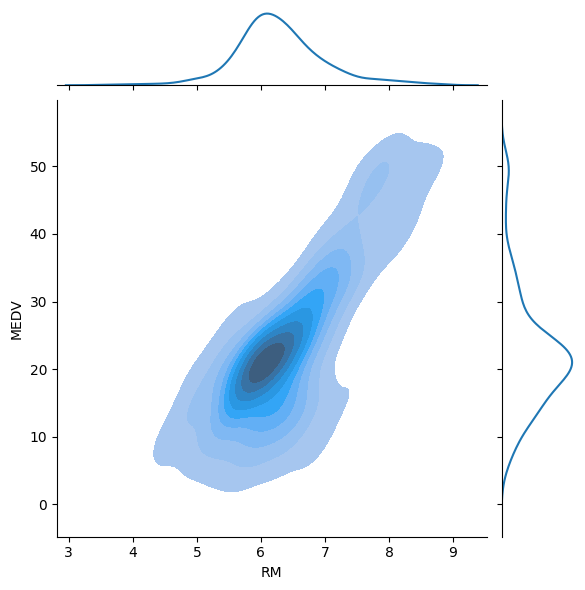

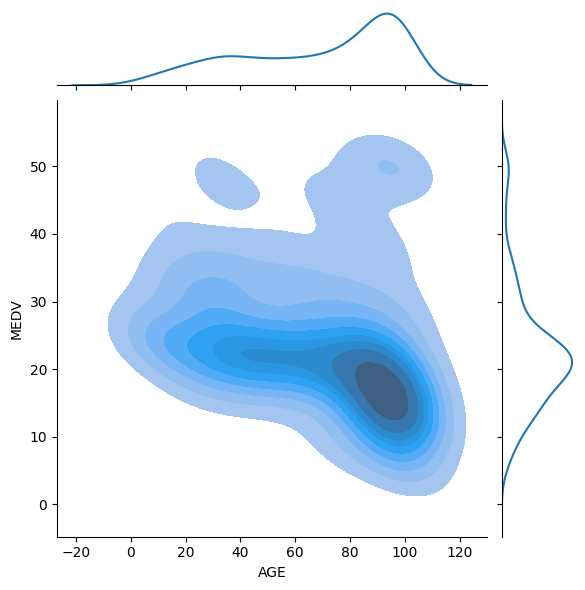

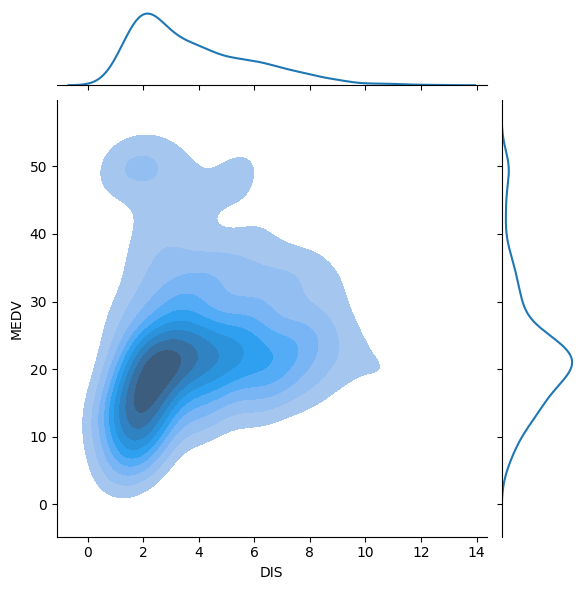

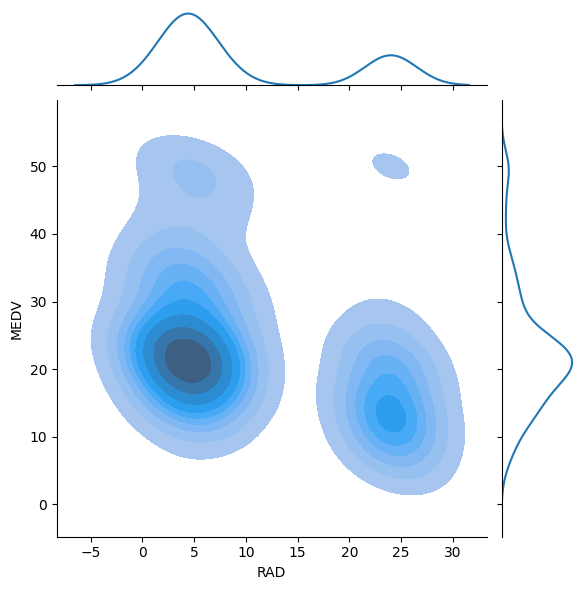

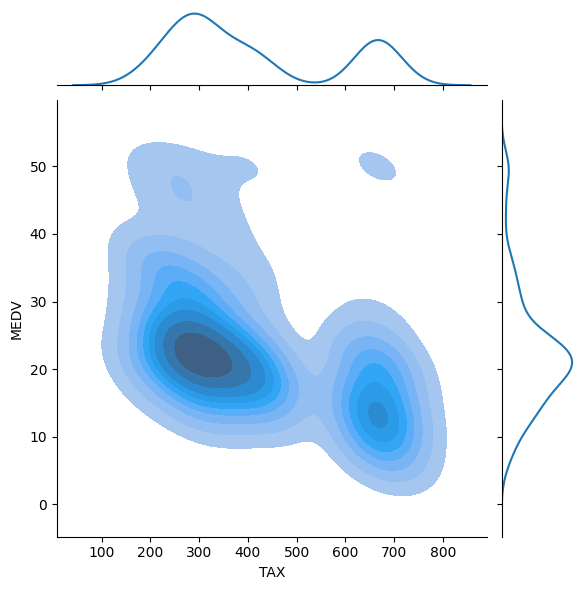

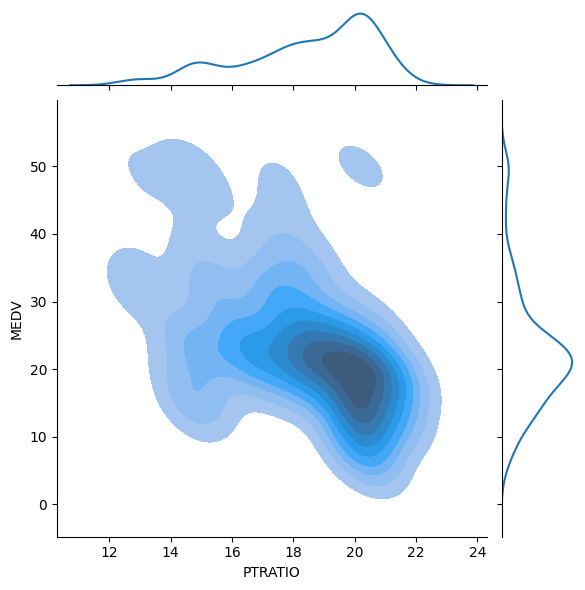

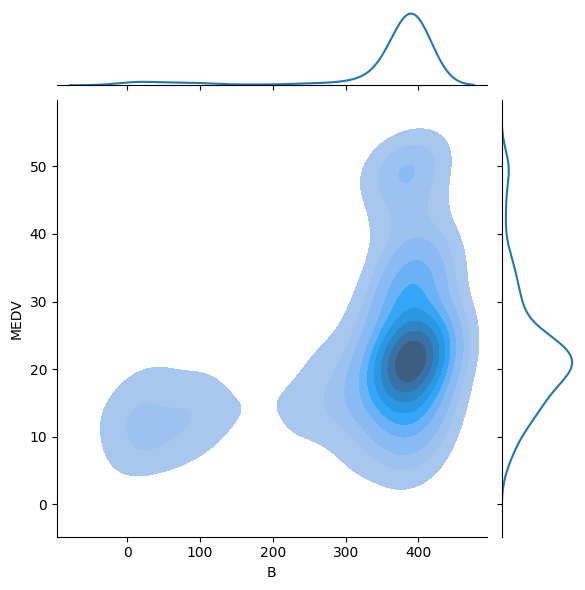

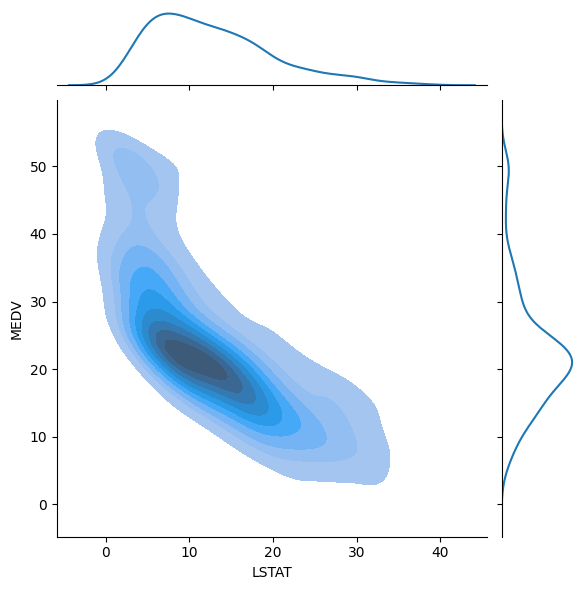

In [349]:
for i in df.columns:
    if i == 'MEDV':
        continue
    sns.jointplot(x =i, y ='MEDV', data = df,kind='kde', shade = True)

<AxesSubplot:>

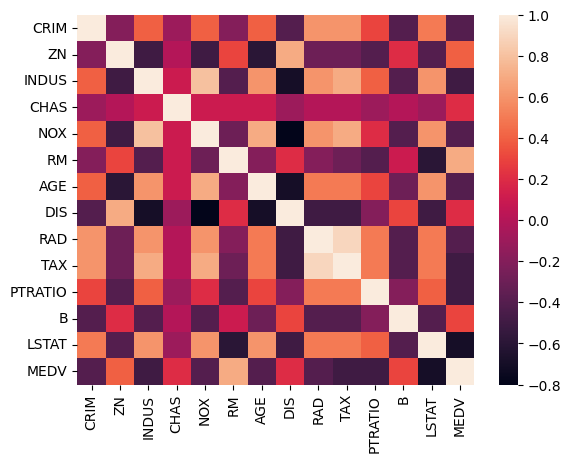

In [350]:
corr_matrix = df.corr().round(1)
sns.heatmap(data=corr_matrix)

In [351]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

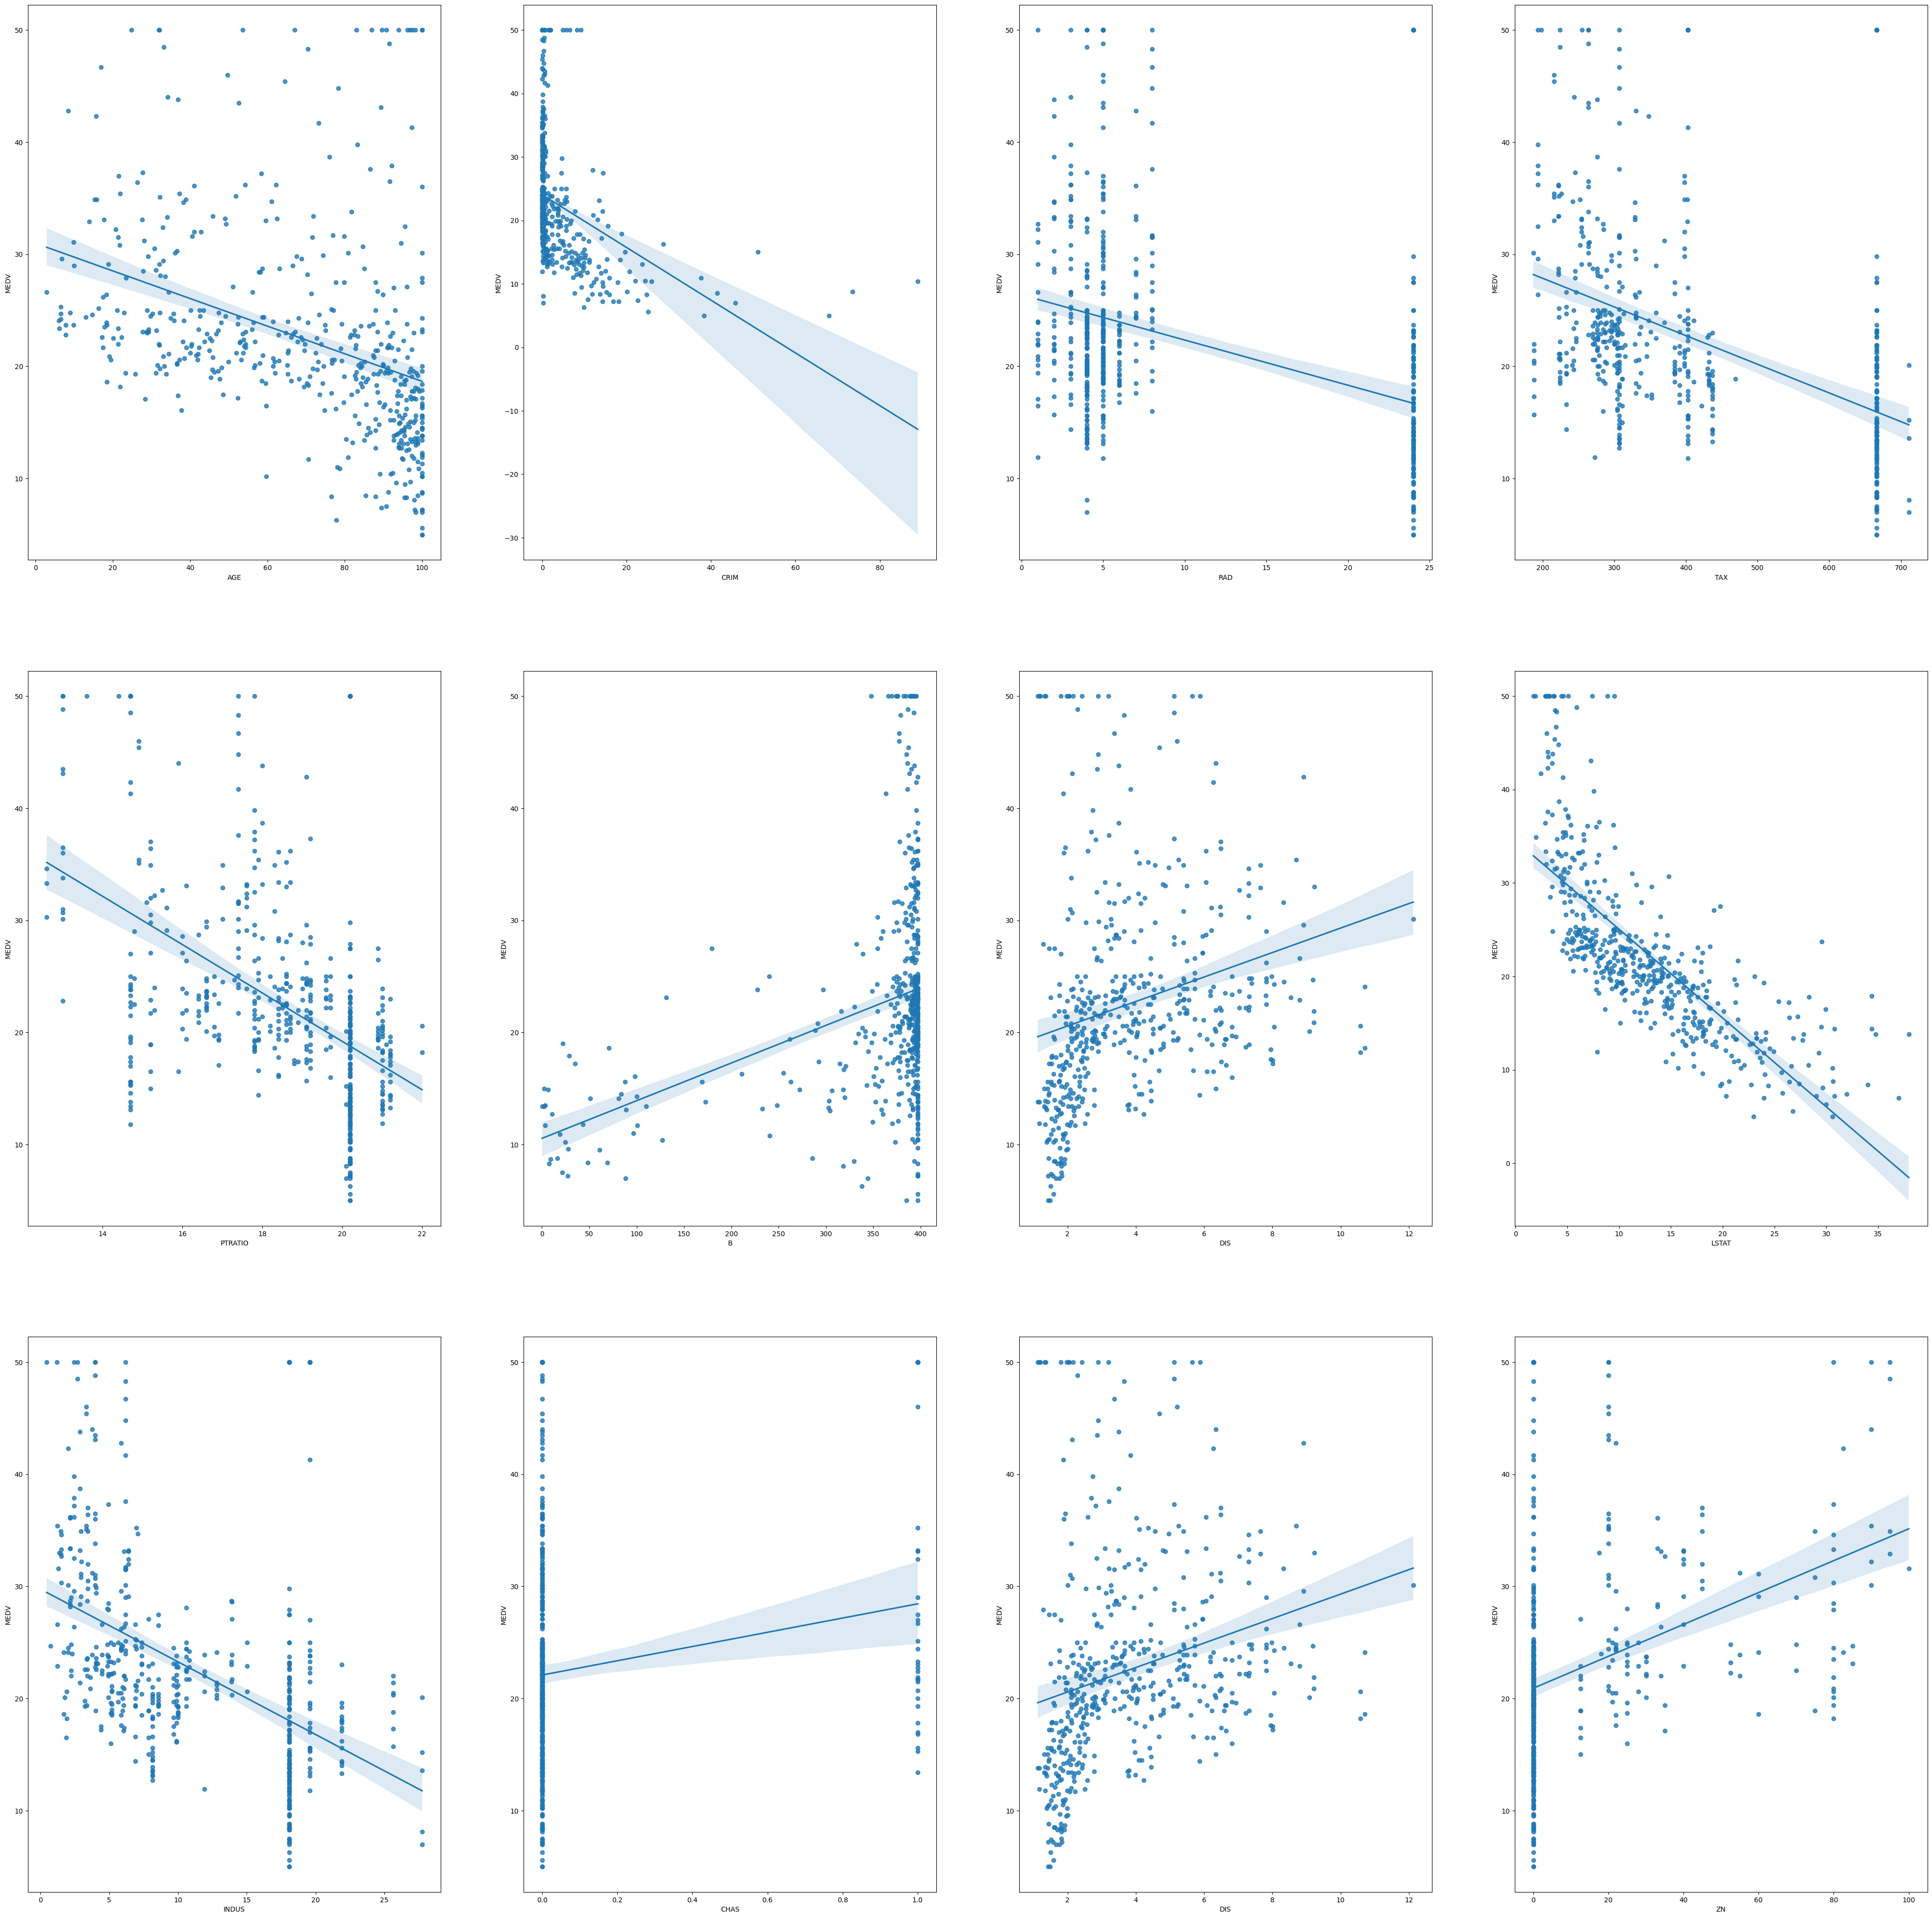

In [352]:
plt.figure(figsize = (50,50))
plt.subplot(3,4,1)
sns.regplot(x=df['AGE'],y=df['MEDV'],data=df)
plt.subplot(3,4,2)
sns.regplot(x=df['CRIM'],y=df['MEDV'],data=df)
plt.subplot(3,4,3)
sns.regplot(x=df['RAD'],y=df['MEDV'],data=df)
plt.subplot(3,4,4)
sns.regplot(x=df['TAX'],y=df['MEDV'],data=df)
plt.subplot(3,4,5)
sns.regplot(x=df['PTRATIO'],y=df['MEDV'],data=df)
plt.subplot(3,4,6)
sns.regplot(x=df['B'],y=df['MEDV'],data=df)
plt.subplot(3,4,7)
sns.regplot(x=df['DIS'],y=df['MEDV'],data=df)
plt.subplot(3,4,8)
sns.regplot(x=df['LSTAT'],y=df['MEDV'],data=df)
plt.subplot(3,4,9)
sns.regplot(x=df['INDUS'],y=df['MEDV'],data=df)
plt.subplot(3,4,10)
sns.regplot(x=df['CHAS'],y=df['MEDV'],data=df)
plt.subplot(3,4,11)
sns.regplot(x=df['DIS'],y=df['MEDV'],data=df)
plt.subplot(3,4,12)
sns.regplot(x=df['ZN'],y=df['MEDV'],data=df)

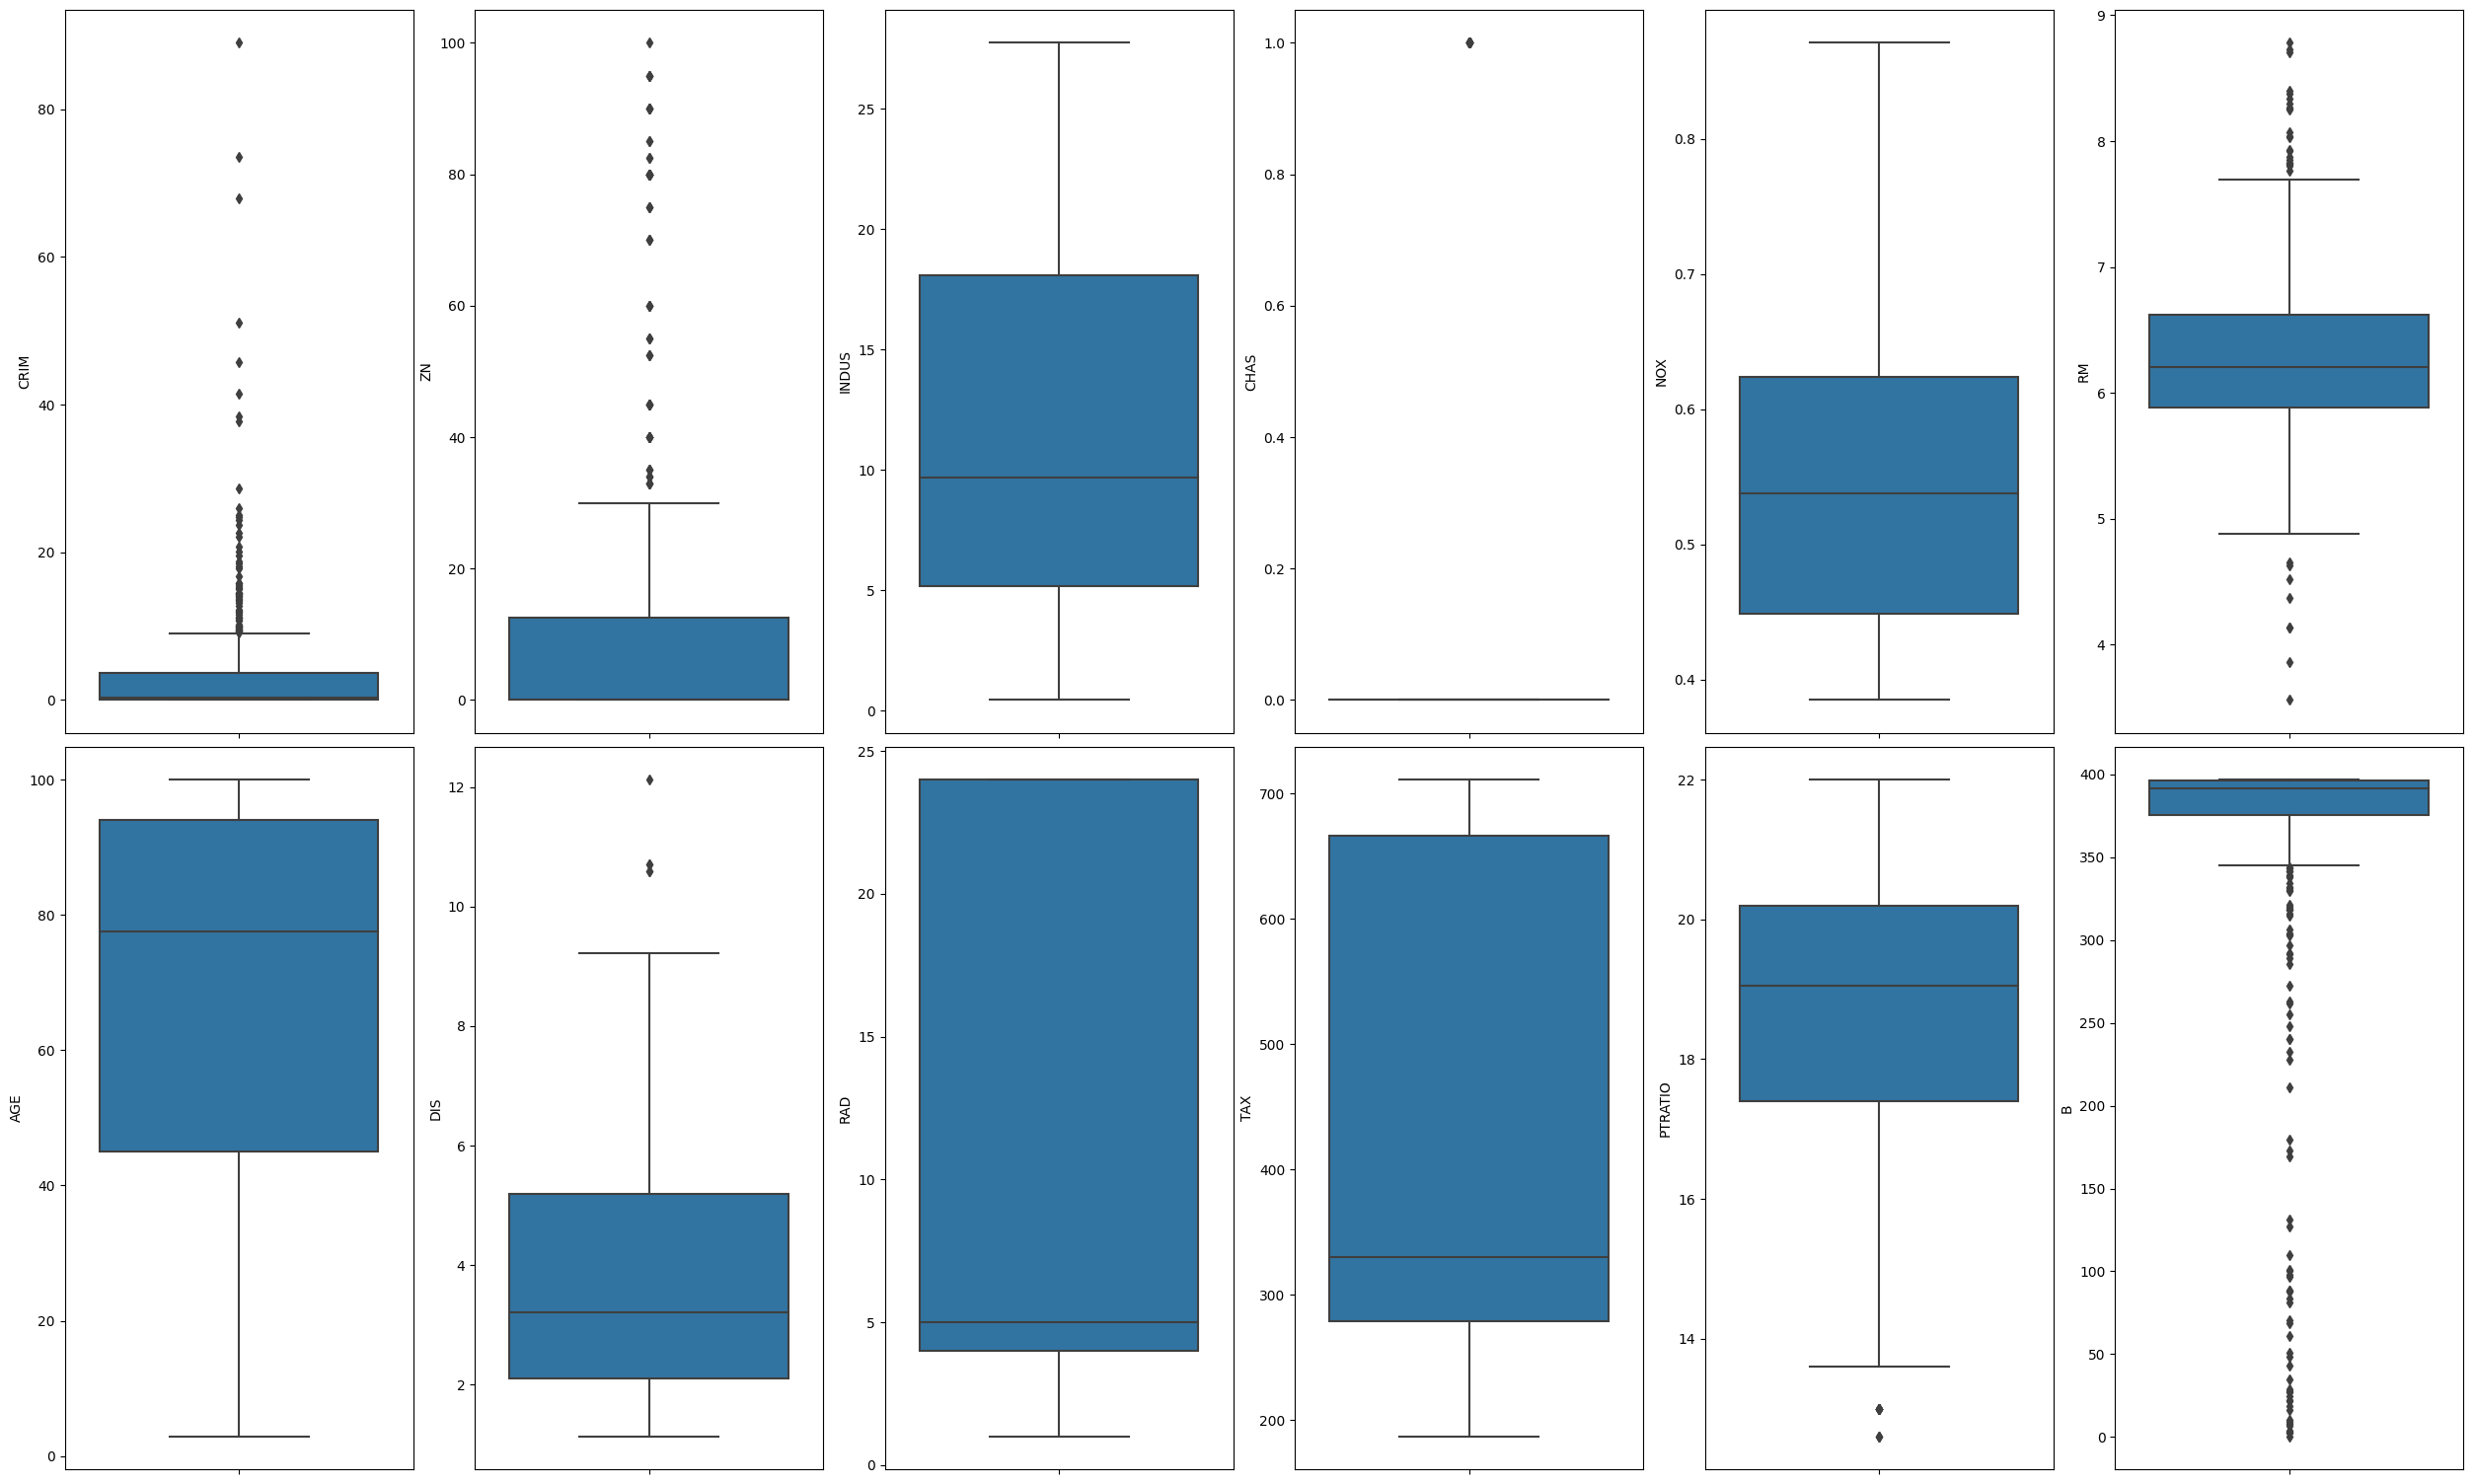

In [353]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(25, 15))
ax = ax.flatten()
index = 0
for i in df.columns:
  if (index >=12):
    break
  sns.boxplot(y=i, data=df, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.5)
plt.show()

In [354]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
ZN,-0.2,1.0,-0.5,-0.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
INDUS,0.4,-0.5,1.0,0.1,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
CHAS,-0.1,-0.0,0.1,1.0,0.1,0.1,0.1,-0.1,-0.0,-0.0,-0.1,0.0,-0.1,0.2
NOX,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.4
RM,-0.2,0.3,-0.4,0.1,-0.3,1.0,-0.2,0.2,-0.2,-0.3,-0.4,0.1,-0.6,0.7
AGE,0.4,-0.6,0.6,0.1,0.7,-0.2,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.4
DIS,-0.4,0.7,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.2
RAD,0.6,-0.3,0.6,-0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.4,0.5,-0.4
TAX,0.6,-0.3,0.7,-0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5


Correlation analysis

#1. The feature 'RM' has a strong positive correlation with the target variable 'MEDV' as the value of 'RM' increases, the value of 'MEDV' also increases. This indicates a positive linear relationship between these two variables. The correlation coefficient between 'RM' and 'MEDV' is 0.7 which is the highest among all features.

#2. The feature 'LSTAT' has a high negative correlation with 'MEDV' as the value of 'LSTAT' increases, the value of 'MEDV' decreases. This indicates a negative linear relationship between these two variables. The correlation coefficient between 'LSTAT' and 'MEDV' is -0.7 which is the second highest among all features.

#3. The feature 'CRIM' has the least correlation value with 'MEDV'.

Preprocessing

In [355]:
print(df.T[df.T.duplicated(keep=False)].T.count())

Series([], dtype: int64)


In [356]:
df[df.duplicated(keep=False)].count()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [357]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
imputer = imputer.fit(df)
imputed = imputer.transform(df)
df = pd.DataFrame(imputed,columns = df.columns)

In [358]:
min= 100
for i in df.columns:
    corr = df[i].corr(df['MEDV'],method='pearson')
    if(min>abs(corr)):
      min=abs(corr)
      x=i

print(min,x)
df = df.drop(x,axis=1)
df

0.17526017719029854 CHAS


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [359]:

scaler = MinMaxScaler(feature_range=(0, 1))
rescaled = scaler.fit_transform(df)


In [360]:
df = pd.DataFrame(rescaled,columns=df.columns)


In [361]:
for i in df.columns:
  df.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(df[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/df[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in CRIM is 13.04% with count 66
Outliers in ZN is 13.44% with count 68
Outliers in INDUS is 0.00% with count 0
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


Model Training and testing


In [362]:
X = df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['MEDV']

In [377]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5,train_size=0.8)

In [378]:
print(len(X_train),len(X_test))

404 102


In [379]:
linearModel = LinearRegression()
supportVectorRegressor = SVR()
knnRegressor = KNeighborsRegressor(n_neighbors=3)

In [380]:
linearModel.fit(X_train,y_train)


LinearRegression()

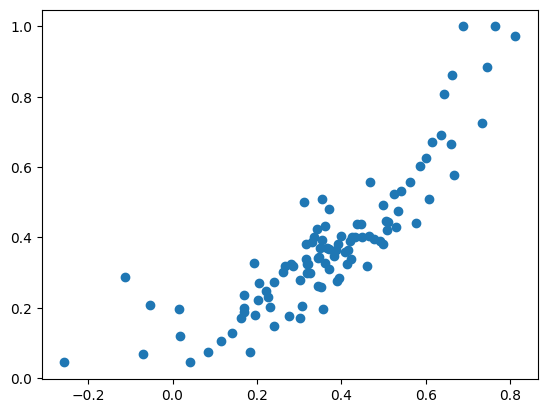

In [381]:
linearPred = linearModel.predict(X_test)
plt.scatter(linearPred,y_test)

In [382]:
knnRegressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

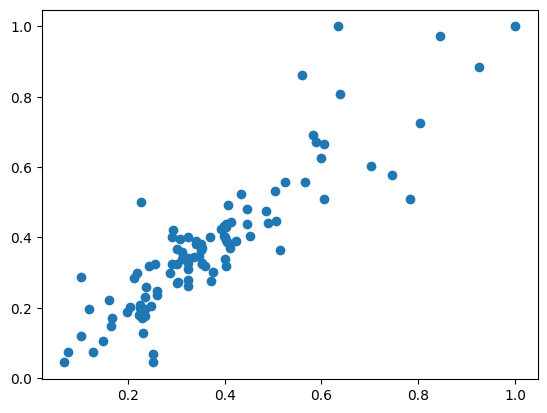

In [383]:
knnPred = knnRegressor.predict(X_test)
plt.scatter(knnPred,y_test)

In [384]:
arr = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
gsmodel = GridSearchCV(estimator=knnRegressor,
                      param_grid={'n_neighbors':arr},
                       cv = 5
                      )
gsmodel.fit(X_train,y_train)
gsPred = gsmodel.predict(X_test)


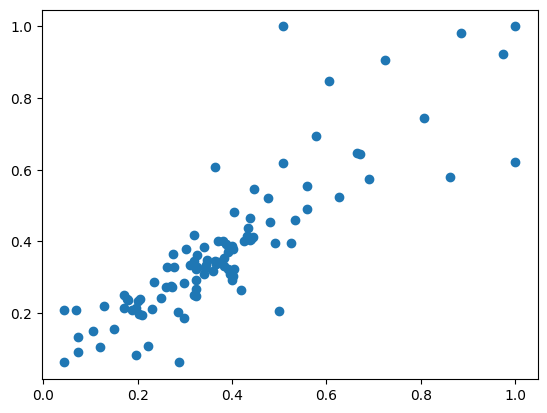

In [385]:
plt.scatter(y_test,gsPred)

In [386]:
gsRes = pd.DataFrame(gsmodel.cv_results_)
gsRes

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005591,0.001964,0.004794,1.605694e-03,1,{'n_neighbors': 1},0.873165,0.796091,0.825222,0.684010,0.732288,0.782155,0.067009,4
1,0.005591,0.001960,0.004006,8.241148e-06,2,{'n_neighbors': 2},0.897279,0.771243,0.896156,0.745474,0.855097,0.833050,0.063377,1
2,0.003997,0.000008,0.004806,1.613380e-03,3,{'n_neighbors': 3},0.876222,0.767964,0.852679,0.757073,0.864667,0.823721,0.050640,2
3,0.003999,0.000020,0.004001,1.846819e-05,4,{'n_neighbors': 4},0.804535,0.735860,0.841568,0.759968,0.854977,0.799382,0.045794,3
4,0.003994,0.000013,0.004000,2.018131e-05,5,{'n_neighbors': 5},0.764352,0.714015,0.832038,0.724326,0.832983,0.773543,0.051000,5
5,0.003992,0.000012,0.004513,1.008530e-03,6,{'n_neighbors': 6},0.714734,0.709695,0.824360,0.692732,0.816651,0.751634,0.056756,6
6,0.004000,0.000001,0.003993,1.325436e-05,7,{'n_neighbors': 7},0.690849,0.713010,0.800289,0.663217,0.791027,0.731679,0.054648,7
7,0.004002,0.000003,0.005602,1.955778e-03,8,{'n_neighbors': 8},0.646749,0.707861,0.788208,0.651301,0.766595,0.712143,0.057875,8
8,0.004794,0.001596,0.004005,4.428685e-06,9,{'n_neighbors': 9},0.631501,0.697391,0.778768,0.647314,0.745629,0.700121,0.056144,9
9,0.004798,0.001597,0.004802,1.599644e-03,10,{'n_neighbors': 10},0.612421,0.684158,0.764405,0.675985,0.732168,0.693827,0.051942,10


In [387]:
gsRes[['param_n_neighbors','rank_test_score']].sort_values(by = 'rank_test_score')

,param_n_neighbors,rank_test_score
1,2,1
2,3,2
3,4,3
0,1,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [388]:
#decision tree
decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [389]:
DTpred = decisionTreeRegressor.predict(X_test)


In [390]:
from sklearn.tree import export_text
tree_rules = export_text(decisionTreeRegressor, feature_names=list(X.columns))
print(tree_rules)

|--- RM <= 0.65
|   |--- LSTAT <= 0.35
|   |   |--- DIS <= 0.03
|   |   |   |--- value: [1.00]
|   |   |--- DIS >  0.03
|   |   |   |--- RM <= 0.57
|   |   |   |   |--- LSTAT <= 0.17
|   |   |   |   |   |--- DIS <= 0.30
|   |   |   |   |   |   |--- ZN <= 0.34
|   |   |   |   |   |   |   |--- DIS <= 0.05
|   |   |   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |   |   |   |--- DIS >  0.05
|   |   |   |   |   |   |   |   |--- LSTAT <= 0.11
|   |   |   |   |   |   |   |   |   |--- value: [0.49]
|   |   |   |   |   |   |   |   |--- LSTAT >  0.11
|   |   |   |   |   |   |   |   |   |--- RM <= 0.55
|   |   |   |   |   |   |   |   |   |   |--- B <= 1.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- B >  1.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- RM >  0.55
|   |   |   |   |   |   |   |   |   |   |--- value: [0.41]
|   |   |   |  

In [391]:
#plotting the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(400,350))
plot_tree(decisionTreeRegressor,feature_names=list(X.columns),filled=True,fontsize=10)
plt.show()


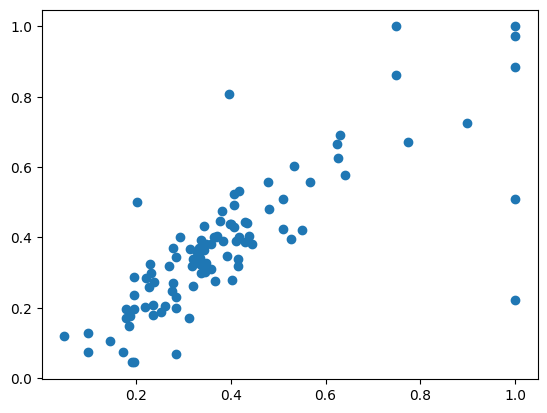

In [ ]:
plt.scatter(DTpred, y_test)

In [316]:
#SVR
supportVectorRegressor = SVR()
supportVectorRegressor.fit(X_train,y_train)

SVR()

In [317]:
svrPred = supportVectorRegressor.predict(X_test)


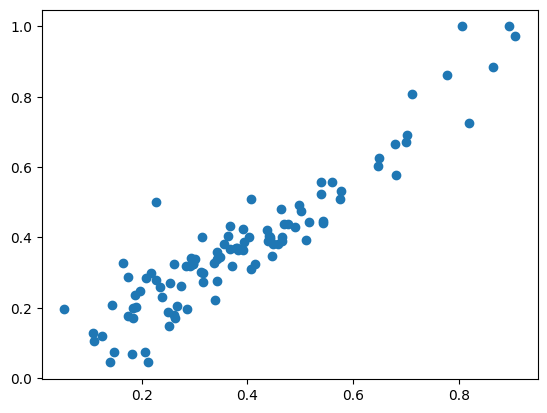

In [318]:
plt.scatter(svrPred,y_test)

In [319]:
print("METRICS FOR LINEAR REGRESSION")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, linearPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, linearPred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linearPred)))
print('R-squared error : ',r2_score(y_test, linearPred))

METRICS FOR LINEAR REGRESSION
Mean Absolute Error : 0.07058492554213651
Mean Squared Error: 0.009971187429166228
Root Mean Squared Error: 0.09985583322553684
R-squared error :  0.7421042684669228


In [320]:
print("METRICS FOR KNN")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, gsPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gsPred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, gsPred)))
print('R-squared error : ',r2_score(y_test, gsPred))

METRICS FOR KNN
Mean Absolute Error : 0.06449891067538127
Mean Squared Error: 0.00899640522875817
Root Mean Squared Error: 0.0948493818048287
R-squared error :  0.7673161271793891


In [321]:
print("METRICS FOR DT")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, DTpred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, DTpred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, DTpred)))
print('R-squared error : ',r2_score(y_test, DTpred))


METRICS FOR DT
Mean Absolute Error : 0.07389978213507625
Mean Squared Error: 0.016069910433309128
Root Mean Squared Error: 0.1267671504503794
R-squared error :  0.5843663218337648


In [322]:
print("METRICS FOR SVR")
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, svrPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svrPred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, svrPred)))
print('R-squared error : ',r2_score(y_test, svrPred))


METRICS FOR SVR
Mean Absolute Error : 0.05546503315394048
Mean Squared Error: 0.005263964185627219
Root Mean Squared Error: 0.0725531817746625
R-squared error :  0.8638523341317067
